# Project 5: Identifying High Risk Areas from NYC Traffic Conditions
## *Template Notebook*

In this notebook:

* [Topic 1](#topic-1)
* [Topic 2](#topic-2)

#### Import Libraries & Read in Data

In [37]:
## standard imports 
import pandas as pd 
import numpy as np
import re
## visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.dummy import DummyClassifier
## modeling
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import MultinomialNB
## trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor
## NLP
from sklearn.feature_extraction.text import CountVectorizer
## analysis
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, make_scorer, f1_score, mean_squared_error, mean_absolute_error

### statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

## options
import sklearn
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [38]:
### read in data
df18 = pd.read_csv('./data/crash_features_2018_cleaned.csv', index_col=0)
df19 = pd.read_csv('./data/crash_features_2019_cleaned.csv', index_col=0)

In [16]:
df18.head()

,CRASHES
2018-01-01,435
2018-01-02,610
2018-01-03,619
2018-01-04,439
2018-01-05,676


In [ ]:
### select data
# X = 
# y = 
### TTS
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Topic 1 <a class="anchor" id="topic-1"></a>
<hr/>

Text(0.5, 1.0, 'Crashes per day 2018')

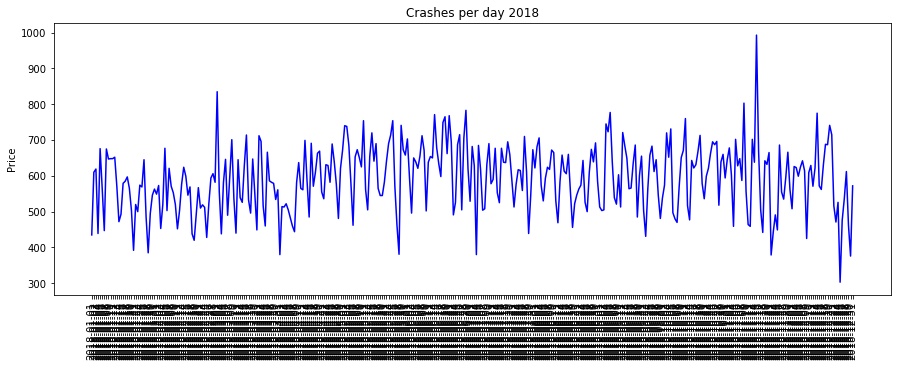

In [39]:
plt.figure(figsize=(15,5))
plt.plot(df18.index, df18['CRASHES'], c='blue')
# plt.plot(test.index, test['price'], c='red')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Crashes per day 2018')

In [40]:
df18['lag_1'] = df18['CRASHES'].shift(1)
df19['lag_1'] = df19['CRASHES'].shift(1)
df18.head()

,CRASHES,lag_1
2018-01-01,435,NaN
2018-01-02,610,435.0
2018-01-03,619,610.0
2018-01-04,439,619.0
2018-01-05,676,439.0


In [41]:
### drop na columns for modeling
df18.dropna(inplace=True)
df19.dropna(inplace=True)

In [42]:
### Set up test and train data
X_train = df18.drop(columns=['lag_1'])
y_train = df18['lag_1']
X_test = df19.drop(columns=['lag_1'])
y_test = df19['lag_1']

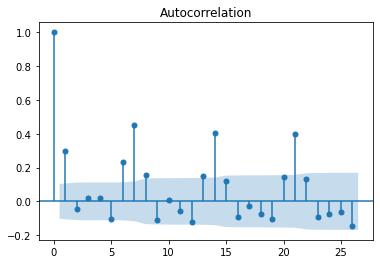

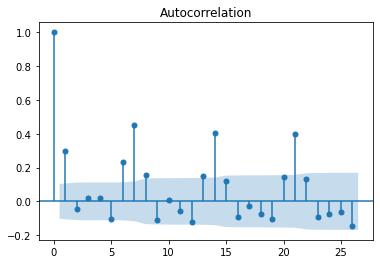

In [27]:
plot_acf(df18['CRASHES'])

## Linear Regression <a class="anchor" id="topic-2"></a>
<hr/>

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
y_preds = lr.predict(X_test)

In [46]:
print('R2 Score: ', lr.score(X_train, y_train))

R2 Score:  0.08736782721948011


In [47]:
print('R2 Score: ', lr.score(X_test, y_test))

R2 Score:  0.08736782721948011
